# Condensed Matter Physics

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Assignment 1

## Question 1

**1. (v) $\mu$ vs $T$**

In [2]:
kB = 8.625e-5
EF1 = 5

In [3]:
def mu_T(T, EF):
    return kB*T*np.log(np.exp(EF/(kB*T)) - 1)

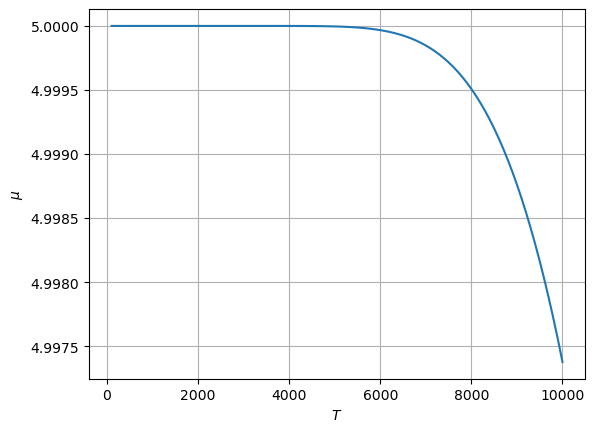

In [4]:
T1 = np.linspace(100, 1e4, 100)
plt.plot(T1, mu_T(T1, EF1))
plt.xlabel('$T$')
plt.ylabel('$\mu$')
plt.grid()
plt.savefig('asg11.png', dpi=150)
plt.show()

Thus $\mu$ is approximately constant over these values.

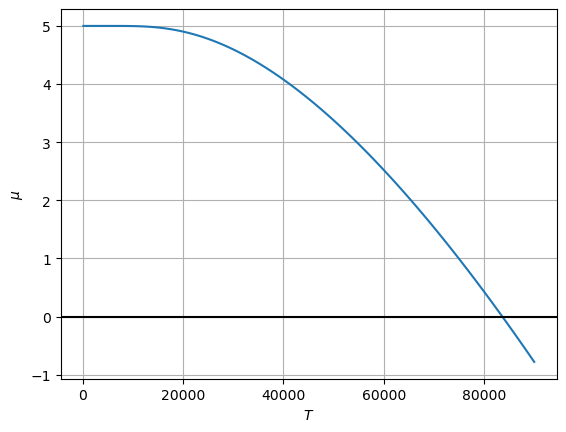

In [5]:
T1 = np.linspace(100, 9e4, 100)
plt.plot(T1, mu_T(T1, EF1))
plt.axhline(0, color='black')
plt.xlabel('$T$')
plt.ylabel('$\mu$')
plt.grid()
plt.savefig('asg12.png', dpi=150)
plt.show()

**1. (vi) Difference between $\mu$ and $\epsilon_F$:**

In [6]:
mu_ep_diff = lambda T, EF: kB*T*np.log(1 - np.exp(-EF/(kB*T)))
EF1, T1 = 7, 300
print(f'EF1={EF1} eV, T1={T1} K, mu-ep_F={mu_ep_diff(T1, EF1)} eV')
EF1, T1 = 1, 1e4
print(f'EF1={EF1} eV, T1={T1} K, mu-ep_F={mu_ep_diff(T1, EF1)} eV')

EF1=7 eV, T1=300 K, mu-ep_F=0.0 eV
EF1=1 eV, T1=10000.0 K, mu-ep_F=-0.3246396109830434 eV


## Question 3

In [7]:
from scipy.integrate import simps

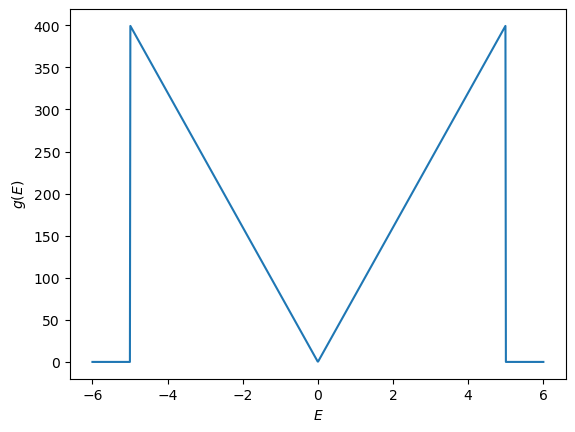

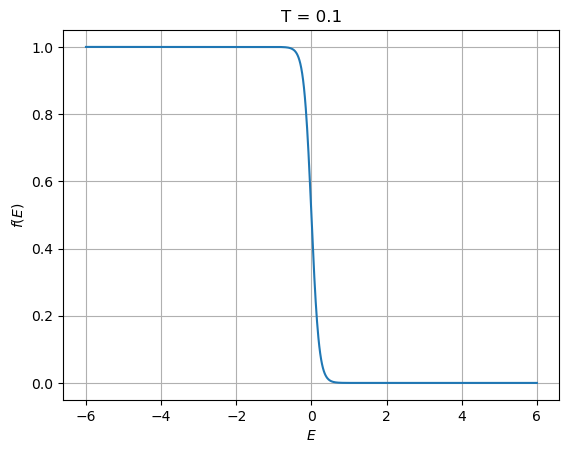

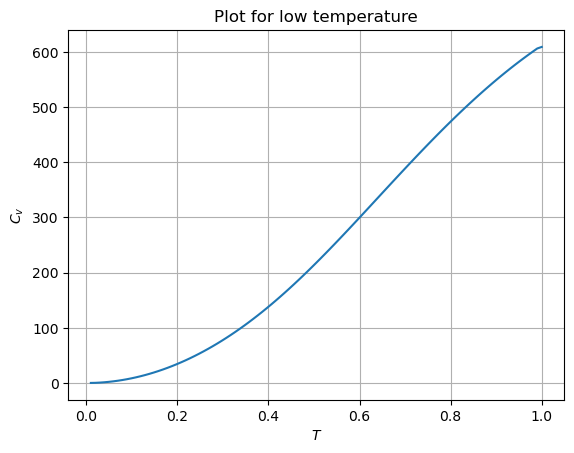

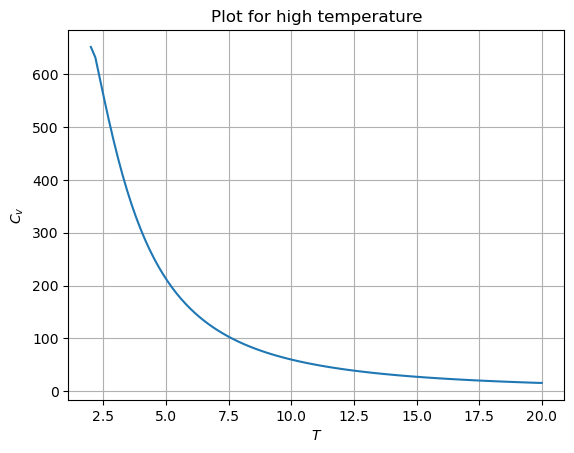

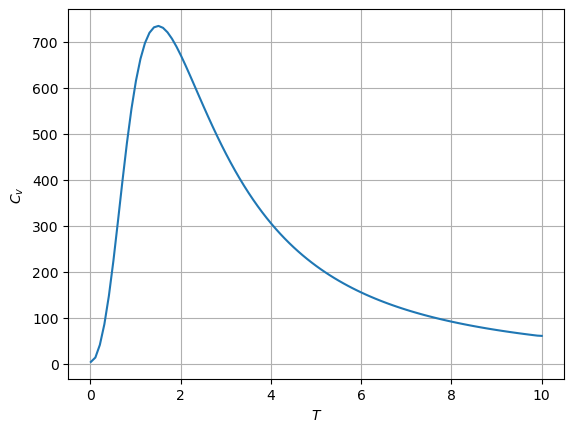

In [8]:
kB = 1
n0 = 1000
E0 = 5
E1 = np.linspace(-1.2*E0,1.2*E0, 1000)
def f_fn(E, mu, T):
    return 1/(np.exp((E-mu)/(kB*T)) + 1)
def g_fn(E):
    gx_arr = []
    for xi in E:
        if abs(xi)<=E0:
            gx_arr.append(2*n0*abs(xi)/E0**2)
        else:
            gx_arr.append(0)
    return np.array(gx_arr)
plt.plot(E1, g_fn(E1))
plt.xlabel('$E$')
plt.ylabel('$g(E)$')
plt.savefig('asg13.png', dpi=150)
plt.show()
Tp = 1e-1
plt.plot(E1, f_fn(E1,0,Tp))
plt.xlabel('$E$')
plt.ylabel('$f(E)$')
plt.title(f'T = {Tp}')
plt.grid()
plt.show()

mu = 0      # Calculated result

def U_Cv_fn(T, E):
    U = []
    for Ti in T:
        Ui = simps(E*g_fn(E)*f_fn(E, 0, Ti), E)
        U.append(Ui)
    U = np.array(U)
    Cv = np.gradient(U, T)
    return U, Cv


T1 = np.linspace(0.01, 1, 101)
U1, C1 = U_Cv_fn(T1,E1)
plt.plot(T1, C1)
plt.xlabel('$T$')
plt.ylabel('$C_v$')
plt.title('Plot for low temperature')
plt.grid()
plt.savefig('asg14.png', dpi=150)
plt.show()
T1 = np.linspace(2, 20, 101)
U1, C1 = U_Cv_fn(T1,E1)
plt.plot(T1, C1)
plt.xlabel('$T$')
plt.ylabel('$C_v$')
plt.title('Plot for high temperature')
plt.grid()
plt.savefig('asg15.png', dpi=150)
plt.show()

T1 = np.linspace(0.01, 10, 101)
U1, C1 = U_Cv_fn(T1,E1)
# plt.plot(T1, U1)
# plt.xlabel('$T$')
# plt.ylabel('$U$')
# plt.grid()
# plt.show()
plt.plot(T1, C1)
plt.xlabel('$T$')
plt.ylabel('$C_v$')
plt.grid()
plt.savefig('asg16.png', dpi=150)
plt.show()